In [1]:
import sys
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append("../../src")

## params

In [2]:
inp_dim = 3
hid_dim = 10
out_dim = 10
nlayer = 10
bias = False
use_bn = False
mode = "linear"
device = 0

nsamp = 500

In [3]:
from losses import *
from block_analysis import block_hessian, curvature_effects
from models import conv_net
from data import gen_cifar10_ds

def get_model_ds_loss():    
    model =  conv_net(inp_dim, hid_dim, out_dim, nlayer, bias, use_bn, mode).cuda(device)
    ds = gen_cifar10_ds(nsamp, device)
    loss_fn = LinearClassification(out_dim)
    return model, ds, loss_fn

In [4]:
model, ds, loss_fn = get_model_ds_loss()

Files already downloaded and verified
Files already downloaded and verified


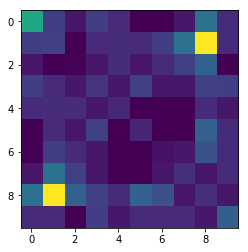

In [6]:
lr = 0.1
H,_ = block_hessian(model, ds, loss_fn, lr)
plt.imshow(H.abs().cpu().numpy())

In [ ]:
H.sum(0)